In [18]:
#import base packages
import pandas as pd
import seaborn as sn
import numpy as np

In [19]:
# load data
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
# Class distribution
class_distribution = df['Outcome'].value_counts()
class_distribution

Outcome
0    500
1    268
Name: count, dtype: int64

In [21]:
# melihat deskripsi statistik dasar data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
# melihat informasi berbagai tipe data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
#deteksi data memiliki nilai null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
#lakukan cleaning untuk nilai yang tidak valid (N/A)
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
# melihat korelasi antar variable terhadap Outcome (target)
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [26]:
# menemukan variable yang paling berpengaruh pada Outcome (target)
correlation.sort_values("Outcome", ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068


<Axes: >

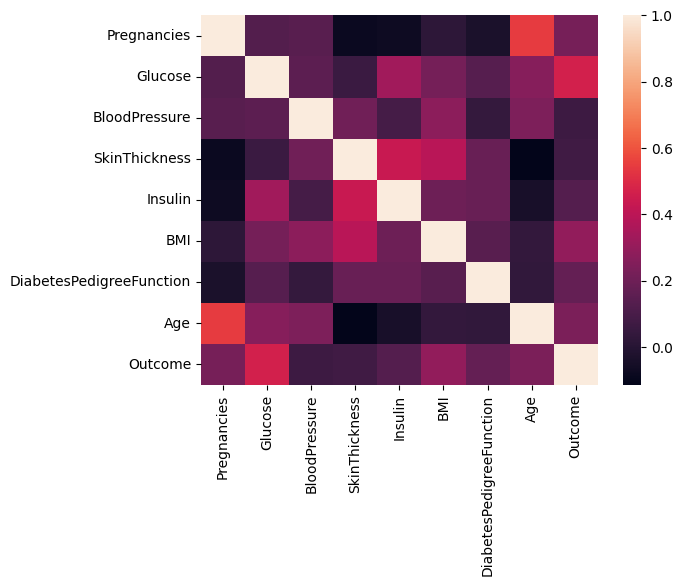

In [27]:
# menampilkan secara visual korelasi variabel
sn.heatmap(correlation)

In [28]:
# asumsinya mengambil 4 variabel yang paling berpengaruh pada dataset
df_selected = df
df_selected

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='Pregnancies'>

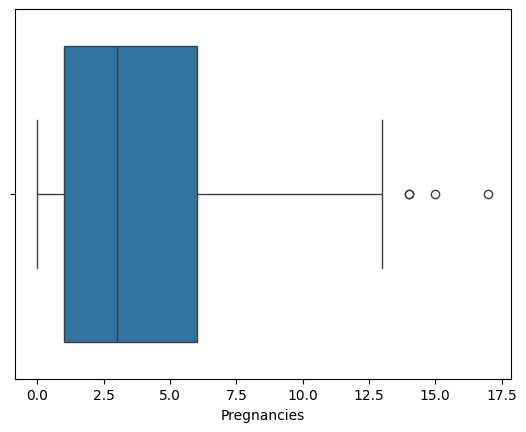

In [29]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'Pregnancies', data = df)

<Axes: xlabel='Glucose'>

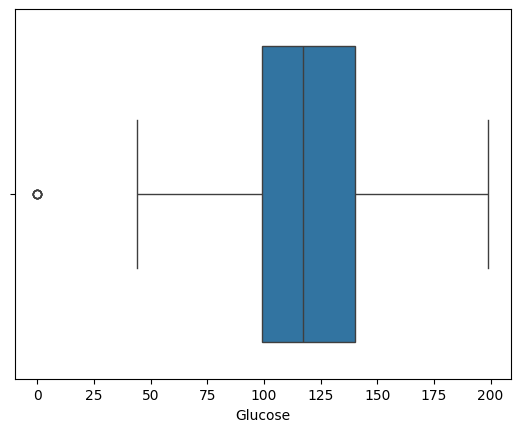

In [30]:
#detect data oulier in Glucose Column
sn.boxplot(x = 'Glucose', data = df)

<Axes: xlabel='BloodPressure'>

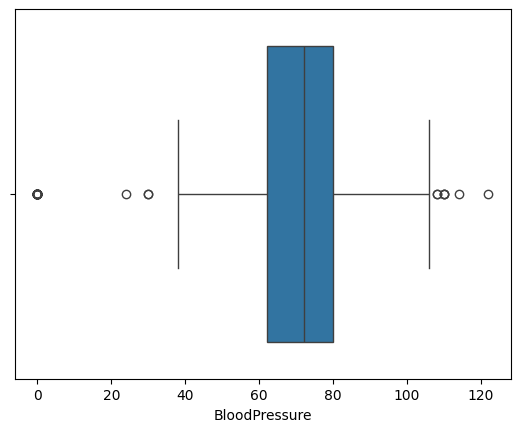

In [31]:
#detect data oulier in BloodPressure Column
sn.boxplot(x = 'BloodPressure', data = df)

<Axes: xlabel='SkinThickness'>

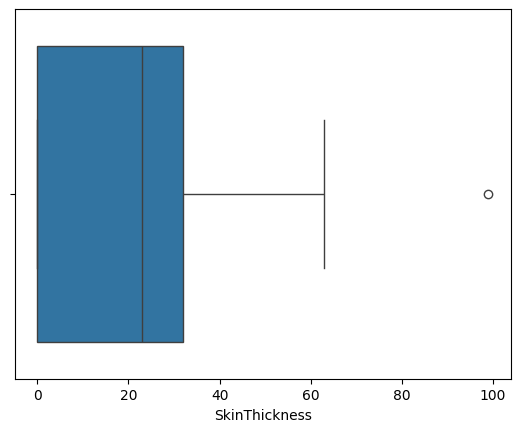

In [32]:
#detect data oulier in SkinThickness Column
sn.boxplot(x = 'SkinThickness', data = df)

<Axes: xlabel='Insulin'>

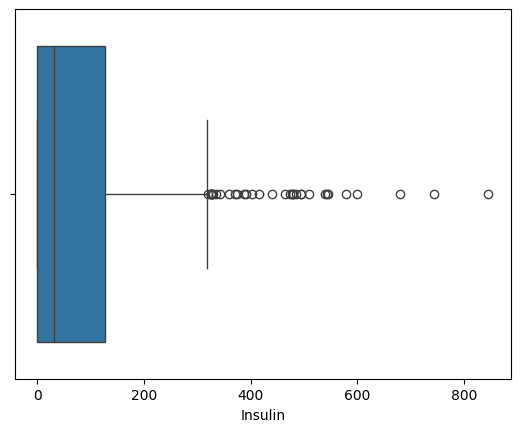

In [33]:
#detect data oulier in Insulin Column
sn.boxplot(x = 'Insulin', data = df)

<Axes: xlabel='BMI'>

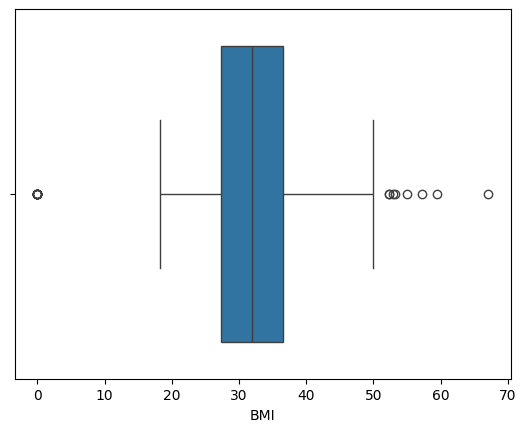

In [34]:
#detect data oulier in Glucose Column
sn.boxplot(x = 'BMI', data = df)

<Axes: xlabel='DiabetesPedigreeFunction'>

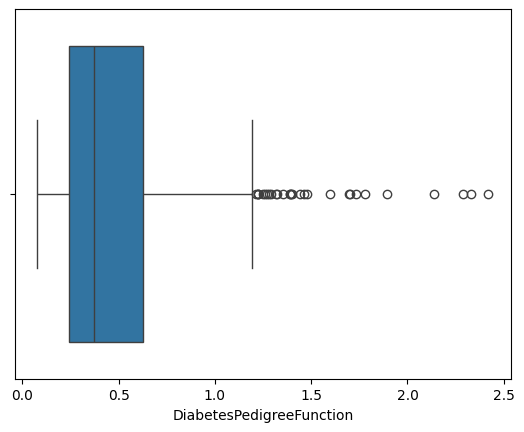

In [35]:
#detect data oulier in DiabetesPedigreeFunction Column
sn.boxplot(x = 'DiabetesPedigreeFunction', data = df)

<Axes: xlabel='Age'>

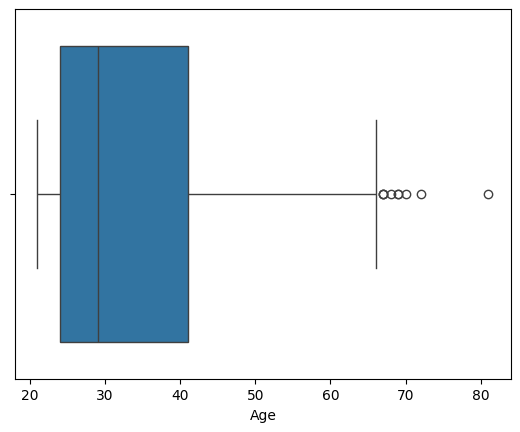

In [36]:
#detect data oulier in Age Column
sn.boxplot(x = 'Age', data = df)

In [37]:
def detect_outlier(column_name):
  q1, q3 = np.percentile(df[column_name], [25,75])
  iqr = q3 - q1

  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)
  return lower_bound, upper_bound

In [38]:
#detect_outlier for column 'Pregnancies'
lower_preg, upper_preg = detect_outlier('Pregnancies')
lower_preg, upper_preg
df_preg = df[(df['Pregnancies'] < lower_preg)|(df['Pregnancies']>upper_preg)]
df_preg

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [39]:
#detect_outlier for column 'Glucose'
lower_gl, upper_gl = detect_outlier('Glucose')
lower_gl, upper_gl
df_gl = df[(df['Glucose'] < lower_gl)|(df['Glucose']>upper_gl)]
df_gl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [40]:
#detect_outlier for column 'BloodPressure'
lower_bloodp, upper_bloodp = detect_outlier('BloodPressure')
lower_bloodp, upper_bloodp
df_bloodp = df[(df['BloodPressure'] < lower_bloodp)|(df['Glucose']>upper_bloodp)]
df_bloodp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [41]:
#detect_outlier for column 'SkinThickness'
lower_SkinThickness, upper_SkinThickness = detect_outlier('SkinThickness')
lower_SkinThickness, upper_SkinThickness
df_SkinThickness = df[(df['SkinThickness'] < lower_SkinThickness)|(df['SkinThickness']>upper_SkinThickness)]
df_SkinThickness

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [42]:
#detect_outlier for column 'Insulin'
lower_Insulin, upper_Insulin = detect_outlier('Insulin')
lower_Insulin, upper_Insulin
df_Insulin = df[(df['Insulin'] < lower_Insulin)|(df['Insulin']>upper_Insulin)]
df_Insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [43]:
#detect_outlier for column 'BMI'
lower_bmi, upper_bmi = detect_outlier('BMI')
lower_bmi, upper_bmi
df_bmi = df[(df['BMI'] < lower_bmi)|(df['BMI']>upper_bmi)]
df_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
145,0,102,75,23,0,0.0,0.572,21,0
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0


In [44]:
#detect_outlier for column 'DiabetesPedigreeFunction'
lower_DiabetesPedigreeFunction, upper_DiabetesPedigreeFunction = detect_outlier('DiabetesPedigreeFunction')
lower_DiabetesPedigreeFunction, upper_DiabetesPedigreeFunction
df_DiabetesPedigreeFunction = df[(df['DiabetesPedigreeFunction'] < lower_DiabetesPedigreeFunction)|(df['DiabetesPedigreeFunction']>upper_DiabetesPedigreeFunction)]
df_DiabetesPedigreeFunction

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [45]:
#detect_outlier for column 'Age'
lower_age, upper_age = detect_outlier('Age')
lower_age, upper_age
df_age = df[(df['Age'] < lower_age)|(df['Age']>upper_age)]
df_age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [46]:
#get index data outlier 'Pregnancies'
dfi_pregnancies = df_preg.index.tolist()
dfi_pregnancies

[88, 159, 298, 455]

In [47]:
#get index data outlier 'Glucose'
dfi_gl = df_gl.index.tolist()
dfi_gl

[75, 182, 342, 349, 502]

In [48]:
dfi_bloodp = df_bloodp.index.tolist()
dfi_bloodp

[0,
 2,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 34,
 36,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 49,
 53,
 54,
 56,
 58,
 60,
 61,
 63,
 64,
 66,
 67,
 69,
 71,
 72,
 73,
 78,
 79,
 80,
 81,
 84,
 85,
 88,
 91,
 93,
 94,
 95,
 99,
 100,
 101,
 102,
 105,
 107,
 110,
 111,
 114,
 115,
 116,
 120,
 121,
 123,
 124,
 125,
 126,
 127,
 128,
 130,
 131,
 132,
 135,
 138,
 140,
 142,
 143,
 144,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 159,
 160,
 162,
 164,
 166,
 167,
 168,
 169,
 171,
 172,
 175,
 177,
 178,
 179,
 181,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 195,
 198,
 199,
 200,
 201,
 202,
 205,
 206,
 207,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 223,
 227,
 228,
 229,
 230,
 231,
 233,
 235,
 236,
 237,
 238,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 251,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 263,
 264,
 266,
 267,
 269,
 271,
 272,
 278,
 

In [49]:
#get index data outlier 'BloodPressure'
dfi_bloodp = df_bloodp.index.tolist()
dfi_bloodp

[0,
 2,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 34,
 36,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 49,
 53,
 54,
 56,
 58,
 60,
 61,
 63,
 64,
 66,
 67,
 69,
 71,
 72,
 73,
 78,
 79,
 80,
 81,
 84,
 85,
 88,
 91,
 93,
 94,
 95,
 99,
 100,
 101,
 102,
 105,
 107,
 110,
 111,
 114,
 115,
 116,
 120,
 121,
 123,
 124,
 125,
 126,
 127,
 128,
 130,
 131,
 132,
 135,
 138,
 140,
 142,
 143,
 144,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 159,
 160,
 162,
 164,
 166,
 167,
 168,
 169,
 171,
 172,
 175,
 177,
 178,
 179,
 181,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 195,
 198,
 199,
 200,
 201,
 202,
 205,
 206,
 207,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 223,
 227,
 228,
 229,
 230,
 231,
 233,
 235,
 236,
 237,
 238,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 251,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 263,
 264,
 266,
 267,
 269,
 271,
 272,
 278,
 

In [50]:
#get index data outlier 'SkinThickness'
dfi_SkinThickness = df_SkinThickness.index.tolist()
dfi_SkinThickness

[579]

In [51]:
#get index data outlier 'Insulin'
dfi_Insulin = df_Insulin.index.tolist()
dfi_Insulin

[8,
 13,
 54,
 111,
 139,
 153,
 186,
 220,
 228,
 231,
 247,
 248,
 258,
 286,
 296,
 360,
 370,
 375,
 392,
 409,
 415,
 480,
 486,
 519,
 574,
 584,
 612,
 645,
 655,
 695,
 707,
 710,
 715,
 753]

In [52]:
#get index data outlier 'BMI'
dfi_bmi = df_bmi.index.tolist()
dfi_bmi

[9,
 49,
 60,
 81,
 120,
 125,
 145,
 177,
 193,
 247,
 303,
 371,
 426,
 445,
 494,
 522,
 673,
 684,
 706]

In [53]:
#get index data outlier 'DiabetesPedigreeFunction'
dfi_DiabetesPedigreeFunction = df_DiabetesPedigreeFunction.index.tolist()
dfi_DiabetesPedigreeFunction

[4,
 12,
 39,
 45,
 58,
 100,
 147,
 187,
 218,
 228,
 243,
 245,
 259,
 292,
 308,
 330,
 370,
 371,
 383,
 395,
 445,
 534,
 593,
 606,
 618,
 621,
 622,
 659,
 661]

In [54]:
#get index data outlier 'Age'
dfi_age = df_age.index.tolist()
dfi_age

[123, 363, 453, 459, 489, 537, 666, 674, 684]

In [55]:
index_to_remove= list(set(dfi_pregnancies) | set(dfi_gl) | set(dfi_bloodp) | set(dfi_SkinThickness) | set(dfi_Insulin) | set(dfi_bmi) | set(dfi_DiabetesPedigreeFunction) | set(dfi_age))
index_to_remove

[0,
 2,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 34,
 36,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 49,
 53,
 54,
 56,
 58,
 60,
 61,
 63,
 64,
 66,
 67,
 69,
 71,
 72,
 73,
 75,
 78,
 79,
 80,
 81,
 84,
 85,
 88,
 91,
 93,
 94,
 95,
 99,
 100,
 101,
 102,
 105,
 107,
 110,
 111,
 114,
 115,
 116,
 120,
 121,
 123,
 124,
 125,
 126,
 127,
 128,
 130,
 131,
 132,
 135,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 159,
 160,
 162,
 164,
 166,
 167,
 168,
 169,
 171,
 172,
 175,
 177,
 178,
 179,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 195,
 198,
 199,
 200,
 201,
 202,
 205,
 206,
 207,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 227,
 228,
 229,
 230,
 231,
 233,
 235,
 236,
 237,
 238,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 251,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 263,
 264,
 2

In [56]:
#data cleanned
df_cleaned = df_selected.drop(index_to_remove)
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
17,7,107,74,0,0,29.6,0.254,31,1
21,8,99,84,0,0,35.4,0.388,50,0
...,...,...,...,...,...,...,...,...,...
758,1,106,76,0,0,37.5,0.197,26,0
760,2,88,58,26,16,28.4,0.766,22,0
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0


In [57]:
#transform data type to numeric
df_cleaned["Outcome"] = pd.to_numeric(df["Outcome"])

In [58]:
# Setelah data di cleaned, record yang tersisa adalah 256 records
df_cleaned.to_csv("diabetes-dataset-cleaned.csv")

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [60]:
# Split the data into features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [61]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [63]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

In [70]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0) # add parameter zero-division to handle warn zero div
recall = recall_score(y_test, y_pred)

In [71]:
# Calculate specificity
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)

In [72]:
# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

Accuracy: 0.8571428571428571
Confusion Matrix:
[[66  0]
 [11  0]]
Precision: 0.0
Recall: 0.0
Specificity: 1.0
